<a href="https://colab.research.google.com/github/Mostaq27/weather_data-processing/blob/main/weather_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The uploaded file name (change if different)
df = pd.read_csv('India_weather_data.csv')

print(f"Loaded {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Loaded 8,766 rows × 9 columns


,Country,Date,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration
0,India,01-01-2000,27.3,12.9,20.0,0.0,9.0,22.0,35850.03
1,India,02-01-2000,26.8,12.8,19.7,0.0,9.8,24.8,35884.66
2,India,03-01-2000,26.4,13.0,19.6,0.0,9.4,19.8,35920.25
3,India,04-01-2000,26.2,13.4,19.6,0.0,9.8,20.2,35880.49
4,India,05-01-2000,26.3,12.6,19.2,0.0,9.8,21.2,35918.76


In [2]:

# 3. Clean & parse dates

# Convert date column (format: dd-mm-yyyy)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Drop rows where date parsing failed (should be none)
df.dropna(subset=['Date'], inplace=True)

# Set date as index
df.set_index('Date', inplace=True)

# Add useful time columns
df['Year']  = df.index.year
df['Month'] = df.index.month
df['Day']   = df.index.day

print("Date range:", df.index.min().date(), "→", df.index.max().date())
df.head()

Date range: 2000-01-01 → 2023-12-31


,Country,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration,Year,Month,Day
Date,,,,,,,,,,,
2000-01-01,India,27.3,12.9,20.0,0.0,9.0,22.0,35850.03,2000,1,1
2000-01-02,India,26.8,12.8,19.7,0.0,9.8,24.8,35884.66,2000,1,2
2000-01-03,India,26.4,13.0,19.6,0.0,9.4,19.8,35920.25,2000,1,3
2000-01-04,India,26.2,13.4,19.6,0.0,9.8,20.2,35880.49,2000,1,4
2000-01-05,India,26.3,12.6,19.2,0.0,9.8,21.2,35918.76,2000,1,5


In [3]:
# 4. Summary stats

df.describe().round(2)

,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration,Year,Month,Day
count,8766.00,8766.00,8766.00,8766.00,8766.00,8766.00,8766.00,8766.00,8766.00,8766.00
mean,32.86,22.42,27.42,3.36,13.12,28.88,34420.45,2011.50,6.52,15.73
std,4.97,4.87,4.62,10.35,4.50,8.97,10439.14,6.92,3.45,8.80
min,19.70,9.20,15.80,0.00,4.40,12.60,0.00,2000.00,1.00,1.00
25%,29.40,18.62,24.30,0.00,9.60,22.00,35554.52,2005.25,4.00,8.00
50%,31.30,23.50,26.80,0.00,12.00,27.00,37312.72,2011.50,7.00,16.00
75%,35.90,25.20,29.70,1.20,15.90,34.60,40219.73,2017.00,10.00,23.00
max,46.90,34.80,40.10,216.30,35.90,78.10,44419.17,2023.00,12.00,31.00


In [4]:
# 5. Yearly aggregates

yearly = df.groupby('Year').agg(
    Temp_Mean   = ('Temp_Mean', 'mean'),
    Precip_Sum  = ('Precipitation_Sum', 'sum')
).reset_index()

yearly.head()

,Year,Temp_Mean,Precip_Sum
0,2000,26.936885,1457.9
1,2001,27.234795,1084.0
2,2002,27.880822,960.5
3,2003,27.364110,1190.2
4,2004,27.323770,884.8


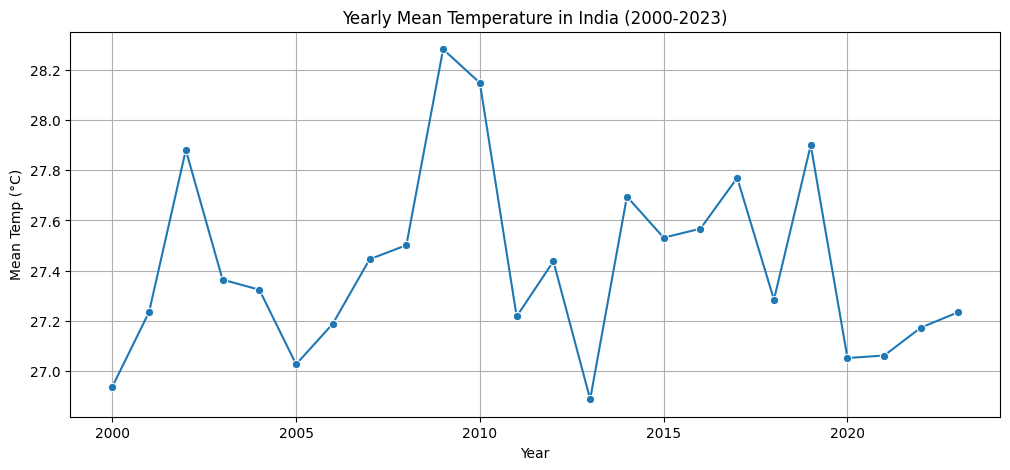

In [5]:
# 6. Yearly temperature trend

plt.figure(figsize=(12,5))
sns.lineplot(data=yearly, x='Year', y='Temp_Mean', marker='o')
plt.title('Yearly Mean Temperature in India (2000-2023)')
plt.ylabel('Mean Temp (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

/tmp/ipython-input-3133378376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly, x='Year', y='Precip_Sum', palette='Blues_d')


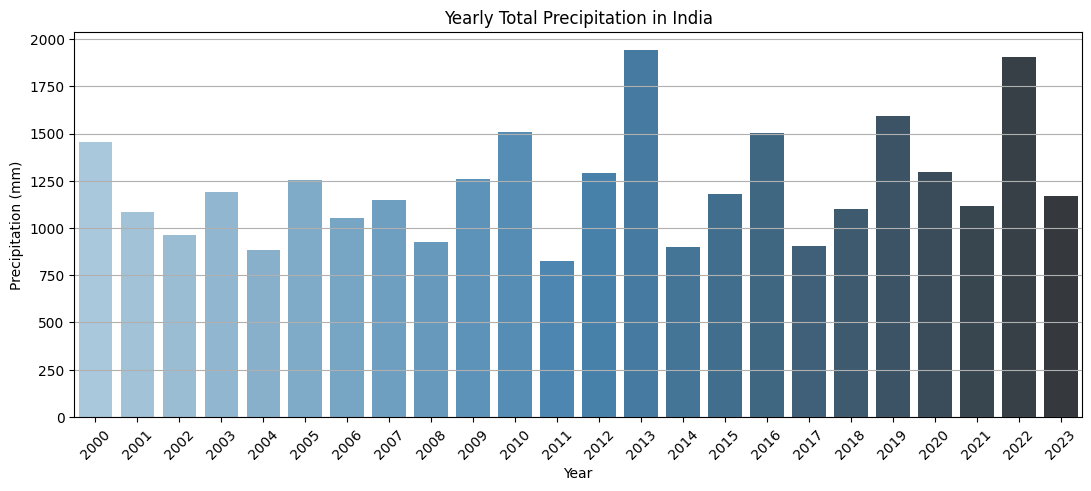

In [6]:
# 7. Yearly precipitation

plt.figure(figsize=(13,5))
sns.barplot(data=yearly, x='Year', y='Precip_Sum', palette='Blues_d')
plt.title('Yearly Total Precipitation in India')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-2791697100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Temp_Mean', palette='coolwarm')


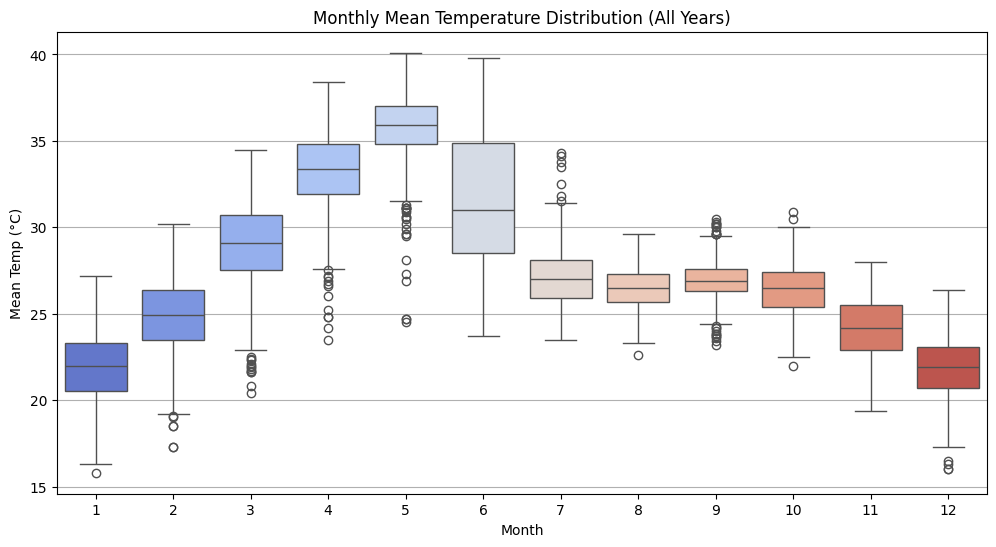

In [7]:
# 8. Monthly temperature boxplot

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Month', y='Temp_Mean', palette='coolwarm')
plt.title('Monthly Mean Temperature Distribution (All Years)')
plt.xlabel('Month')
plt.ylabel('Mean Temp (°C)')
plt.grid(axis='y')
plt.show()

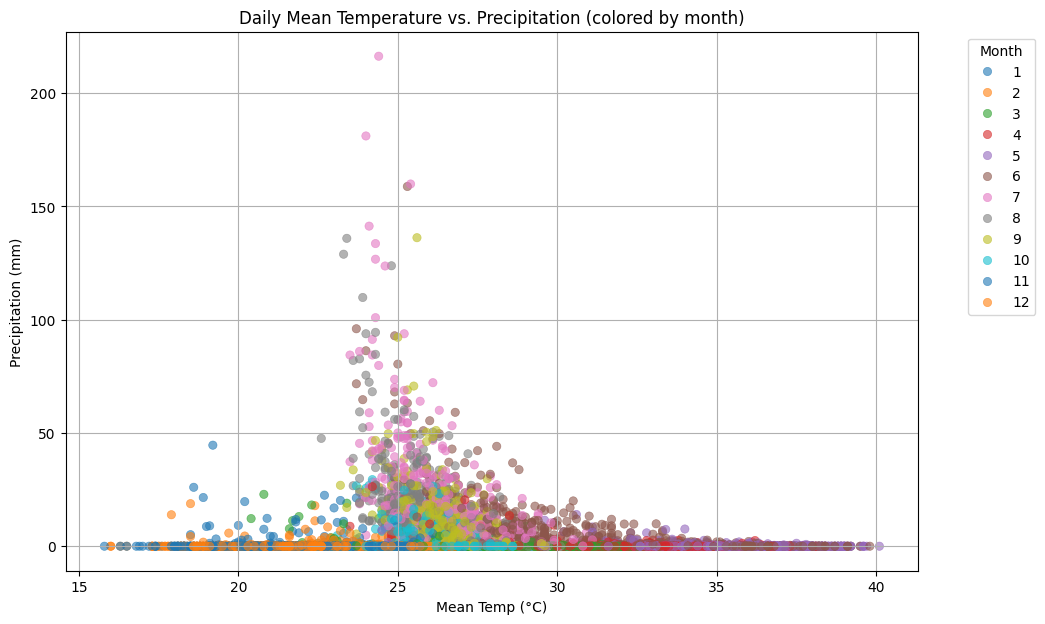

In [10]:
# 9. Temp-Precip scatter

plt.figure(figsize=(11,7))
sns.scatterplot(data=df, x='Temp_Mean', y='Precipitation_Sum',
                hue='Month', palette='tab10', alpha=0.6, edgecolor=None)
plt.title('Daily Mean Temperature vs. Precipitation (colored by month)')
plt.xlabel('Mean Temp (°C)')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [12]:
# 10. Export cleaned dataframe

from google.colab import files
df.to_csv('India_weather_cleaned.csv')
files.download('India_weather_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>